# Example 4: nx-Graph

This example demonstrates how to use the SIR_3S_to_nx_graph() of the SIR 3S Toolkit to generate a nx-Graph based on a SIR 3S model.

# SIR 3S Installation

In [87]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64"

# Imports

Note: The SIR 3S Toolkit requires the Sir3S_Toolkit.dll included in SIR 3S installations (version Quebec and higher).

In [88]:
import sir3stoolkit

The core of sir3stoolkit is a Python wrapper around basic functionality of SIR 3S, offering a low-level access to the creation, modification and simulation of SIR 3S models. In the future pure python subpackages may be added.

In [89]:
from sir3stoolkit.core import wrapper

In [90]:
from sir3stoolkit.mantle import mantle

In [91]:
sir3stoolkit

<module 'sir3stoolkit' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\__init__.py'>

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [92]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional imports

In [93]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Initialization

In [94]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


# Open Model

In [95]:
dbFilePath=r"C:\Users\aUsername\3S\Quebec_PT3S\Example5.db3"

In [96]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Generate nx Graph

In [97]:
G=s3s.SIR_3S_to_nx_graph()

[2025-11-07 17:51:21,395] INFO in sir3stoolkit.mantle.alternative_models: [graph] Building nx graph...
[2025-11-07 17:51:21,395] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Node
[2025-11-07 17:51:21,400] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2025-11-07 17:51:21,401] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 1 metadata properties.
[2025-11-07 17:51:21,402] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['Fkcont'], geometry...
[2025-11-07 17:51:21,580] INFO in sir3stoolkit.mantle.dataframes: [metadata] 0 non-empty end node columns were created)
[2025-11-07 17:51:21,582] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (1559, 3)
[2025-11-07 17:51:21,582] INFO in sir3stoolkit.mantle.alternative_models: [graph] Retrieved 1559 nodes.
[2025-11-07 17:51:21,585] INFO in 

# View generated Graph

As you can see below the graph does not contain any additional properties or result values. 

## Node and Edge Attributes

In [98]:
node_attrs = {n: data for n, data in G.nodes(data=True)}

In [99]:
node_attrs

{'4680103632661687203': {'tk': '4680103632661687203',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (55176.324 98780.495)>},
 '5540855804579832866': {'tk': '5540855804579832866',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (48826.42 98285.548)>},
 '5517245021561014546': {'tk': '5517245021561014546',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (54520.836 98283.399)>},
 '5025567272877293202': {'tk': '5025567272877293202',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (53007.627 98806.658)>},
 '4660263951317730783': {'tk': '4660263951317730783',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (47711.71 98384.67)>},
 '5280005296274670686': {'tk': '5280005296274670686',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (47842.339 97219.316)>},
 '5294552132139044612': {'tk': '5294552132139044612',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (48064.237 97197.304)>},
 '4837967340067928800': {'tk': '4837967340067928800',
  'F

In [100]:
edge_attrs = {(u, v): data for u, v, data in G.edges(data=True)}

In [101]:
edge_attrs

{('4680103632661687203', '5432609004919372061'): {'tk': '5460759352148475007',
  'Fkcont': '5478326535335532120',
  'geometry': <LINESTRING (55176.324 98780.495, 55231.478 98824.335)>,
  'fkKI': '4680103632661687203',
  'fkKK': '5432609004919372061',
  'element type': 'Pipe'},
 ('4680103632661687203', '5386123725358244012'): {'tk': '5752799364449250609',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (55176.324 98780.495)>,
  'fkKI': '4680103632661687203',
  'fkKK': '5386123725358244012',
  'element type': 'DistrictHeatingConsumer'},
 ('5540855804579832866', '5543149566780017208'): {'tk': '4623835636559233964',
  'Fkcont': '5478326535335532120',
  'geometry': <LINESTRING (48826.42 98285.548, 48789.657 98221.378)>,
  'fkKI': '5540855804579832866',
  'fkKK': '5543149566780017208',
  'element type': 'Pipe'},
 ('5540855804579832866', '5416299466389719783'): {'tk': '5400418565581679320',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (48826.42 98285.548)>,
  'fkKI': '55408

## Connected ?

In [102]:
nx.is_weakly_connected(G) # Is connected as an undirected graph

True

## Plot

In [103]:
def plot_nx_graph(G, main_container):
    # Extract node positions from geometry and filter by Fkcont
    pos = {
        node_id: (data['geometry'].x, data['geometry'].y)
        for node_id, data in G.nodes(data=True)
        if 'geometry' in data and hasattr(data['geometry'], 'x') and hasattr(data['geometry'], 'y')
        and data.get('Fkcont') == main_container
    }

    # Extract edges with valid geometry and both nodes in pos
    edges = [
        (u, v, data) for u, v, data in G.edges(data=True)
        if u in pos and v in pos and 'geometry' in data and data['geometry'].geom_type != 'Point'
    ]

    # Plot
    plt.figure(figsize=(20, 14))
    for _, _, data in edges:
        geom = data['geometry']
        x, y = geom.xy
        plt.plot(x, y, color='black', linewidth=1)

    # Only draw nodes that have positions
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(pos.keys()), node_color='black', node_size=10)
    plt.title(f"nx-Graph'{main_container}'")
    plt.axis('equal')
    plt.show()

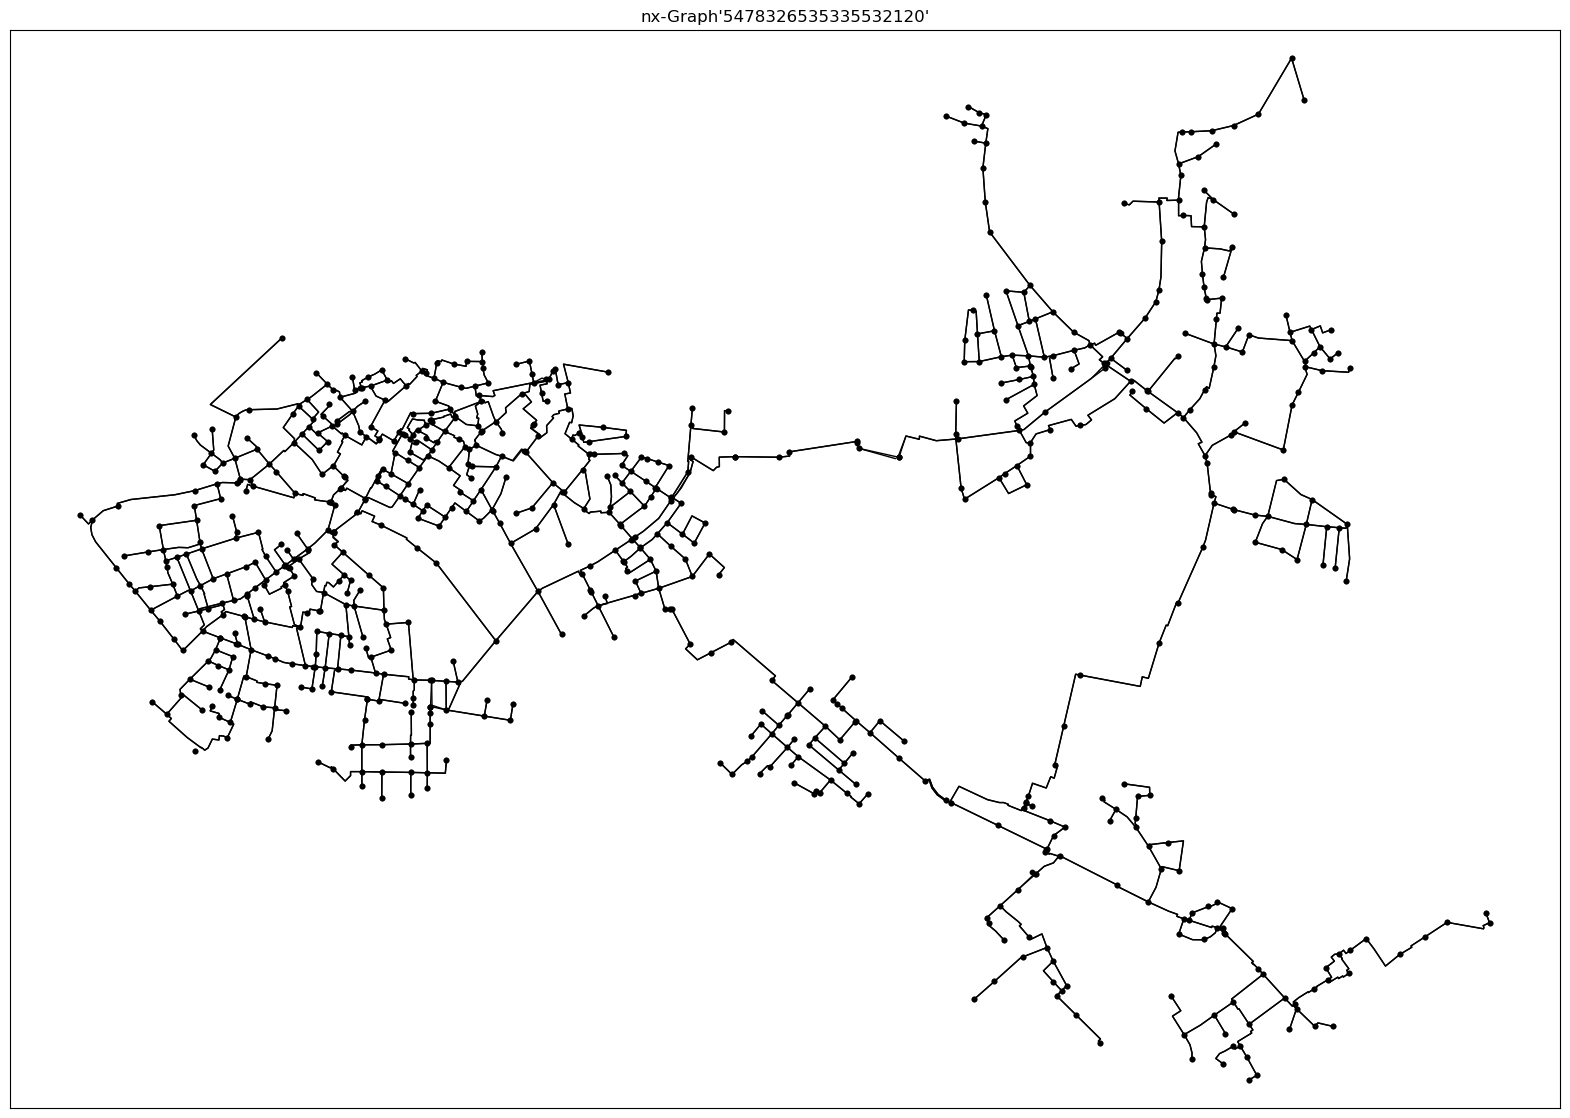

In [104]:
plot_nx_graph(G, s3s.GetMainContainer()[0])

# Add metadata

Now, we can metadata properties to the nodes and edges.

In [105]:
props_to_add = ["Kvr"]  
G = s3s.add_properties_to_graph(
    G=G,
    element_type="Node",
    properties=props_to_add,
)

[2025-11-07 17:51:24,453] INFO in sir3stoolkit.mantle.alternative_models: [graph] Enriching graph with properties for element_type='Node'
[2025-11-07 17:51:24,457] INFO in sir3stoolkit.mantle.alternative_models: [graph] Using 1 metadata props and 0 result props.
[2025-11-07 17:51:24,462] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Node
[2025-11-07 17:51:24,464] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2025-11-07 17:51:24,468] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 1 metadata properties.
[2025-11-07 17:51:24,470] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['Kvr']...
[2025-11-07 17:51:24,545] INFO in sir3stoolkit.mantle.dataframes: [metadata] 0 non-empty end node columns were created)
[2025-11-07 17:51:24,545] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (

In [106]:
node_attrs = {n: data for n, data in G.nodes(data=True)}

In [107]:
node_attrs

{'4680103632661687203': {'tk': '4680103632661687203',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (55176.324 98780.495)>,
  'Kvr': '1'},
 '5540855804579832866': {'tk': '5540855804579832866',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (48826.42 98285.548)>,
  'Kvr': '1'},
 '5517245021561014546': {'tk': '5517245021561014546',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (54520.836 98283.399)>,
  'Kvr': '2'},
 '5025567272877293202': {'tk': '5025567272877293202',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (53007.627 98806.658)>,
  'Kvr': '1'},
 '4660263951317730783': {'tk': '4660263951317730783',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (47711.71 98384.67)>,
  'Kvr': '1'},
 '5280005296274670686': {'tk': '5280005296274670686',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (47842.339 97219.316)>,
  'Kvr': '2'},
 '5294552132139044612': {'tk': '5294552132139044612',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT

In [108]:
props_to_add = ["DN", "L"]  
G = s3s.add_properties_to_graph(
    G=G,
    element_type="Pipe",
    properties=props_to_add,
)

[2025-11-07 17:51:24,735] INFO in sir3stoolkit.mantle.alternative_models: [graph] Enriching graph with properties for element_type='Pipe'
[2025-11-07 17:51:24,739] INFO in sir3stoolkit.mantle.alternative_models: [graph] Using 2 metadata props and 0 result props.
[2025-11-07 17:51:24,743] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-11-07 17:51:24,748] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1672 element(s) of element type ObjectTypes.Pipe.
[2025-11-07 17:51:24,750] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 2 metadata properties.
[2025-11-07 17:51:24,751] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN', 'L']...
[2025-11-07 17:51:24,979] INFO in sir3stoolkit.mantle.dataframes: [metadata] 0 non-empty end node columns were created)
[2025-11-07 17:51:24,982] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shap

In [109]:
edge_attrs = {(u, v): data for u, v, data in G.edges(data=True)}

In [110]:
edge_attrs

{('4680103632661687203', '5432609004919372061'): {'tk': '5460759352148475007',
  'Fkcont': '5478326535335532120',
  'geometry': <LINESTRING (55176.324 98780.495, 55231.478 98824.335)>,
  'fkKI': '4680103632661687203',
  'fkKK': '5432609004919372061',
  'element type': 'Pipe',
  'DN': '125',
  'L': '75'},
 ('4680103632661687203', '5386123725358244012'): {'tk': '5752799364449250609',
  'Fkcont': '5478326535335532120',
  'geometry': <POINT (55176.324 98780.495)>,
  'fkKI': '4680103632661687203',
  'fkKK': '5386123725358244012',
  'element type': 'DistrictHeatingConsumer'},
 ('5540855804579832866', '5543149566780017208'): {'tk': '4623835636559233964',
  'Fkcont': '5478326535335532120',
  'geometry': <LINESTRING (48826.42 98285.548, 48789.657 98221.378)>,
  'fkKI': '5540855804579832866',
  'fkKK': '5543149566780017208',
  'element type': 'Pipe',
  'DN': '350',
  'L': '100'},
 ('5540855804579832866', '5416299466389719783'): {'tk': '5400418565581679320',
  'Fkcont': '5478326535335532120',
  '